In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import make_classification

In [2]:
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=2000,n_classes=2,weights=[1,1],random_state=1)

In [3]:
X.shape

(2000, 20)

In [4]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [6]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [7]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9829333333333334


In [8]:
ytrain_pred

array([[1.  , 0.  ],
       [0.98, 0.02],
       [0.03, 0.97],
       ...,
       [0.98, 0.02],
       [1.  , 0.  ],
       [0.18, 0.82]])

In [9]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


In [10]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier = AdaBoostClassifier()
ada_classifier.fit(X_train,y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.981670071491109
Adaboost test roc-auc: 0.9426111111111111


In [12]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9849555555555556


In [13]:
pd.concat(pred,axis=1)

,0,1,2,3
0,1.00,0.991861,0.559186,1.0
1,0.00,0.000008,0.463282,0.0
2,0.96,0.966929,0.538202,0.8
3,0.95,0.761539,0.509875,0.8
4,0.58,0.779443,0.490344,0.4
...,...,...,...,...
595,0.01,0.024239,0.461121,0.0
596,0.01,0.000003,0.441377,0.0
597,0.98,0.984385,0.532403,1.0
598,0.01,0.001147,0.441720,0.2


In [14]:
final_prediction

0      0.887762
1      0.115823
2      0.816283
3      0.755353
4      0.562447
         ...   
595    0.123840
596    0.112845
597    0.874197
598    0.163217
599    0.832357
Length: 600, dtype: float64

In [15]:
fpr,tpr,thresholds = roc_curve(y_test,final_prediction)
thresholds

array([1.9109413 , 0.9109413 , 0.90922166, 0.90827475, 0.79317698,
       0.79162833, 0.78702438, 0.7855558 , 0.78260088, 0.78071156,
       0.77297605, 0.77287124, 0.72157482, 0.72137362, 0.70294088,
       0.70143711, 0.67442282, 0.66743537, 0.59827749, 0.59425354,
       0.5921569 , 0.58364346, 0.57899047, 0.57800386, 0.55792732,
       0.53469563, 0.51605932, 0.48366892, 0.44950602, 0.38590767,
       0.38129719, 0.34995613, 0.34836612, 0.2346341 , 0.23396893,
       0.23348126, 0.23140421, 0.20602808, 0.20348417, 0.11790921,
       0.1178351 , 0.10498954])

In [16]:
from sklearn.metrics import accuracy_score
accuracy_ls = []

for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
28,0.449506,0.961667
27,0.483669,0.958333
26,0.516059,0.956667
24,0.557927,0.956667
25,0.534696,0.955000


In [17]:
accuracy_ls

,thresholds,accuracy
28,0.449506,0.961667
27,0.483669,0.958333
26,0.516059,0.956667
24,0.557927,0.956667
25,0.534696,0.955000
23,0.578004,0.953333
21,0.583643,0.951667
18,0.598277,0.951667
22,0.578990,0.951667
19,0.594254,0.951667


In [18]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='blue',label='ROC')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

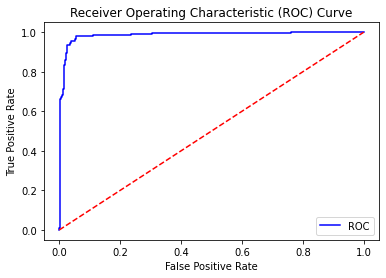

In [19]:
plot_roc_curve(fpr,tpr)